<a href="https://colab.research.google.com/github/Sertaky/TensorFlow/blob/main/02_Neural_Network_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A classification problem involves predicting whether something is one thing or another.


For example, you might want to:


* Predict whether or not someone has heart disease based on their health parameters. This is called binary classification since there are only two options.

* Decide whether a photo of is of food, a person or a dog. This is called multi-class classification since there are more than two options.

* Predict what categories should be assigned to a Wikipedia article. This is called multi-label classification since a single article could have more than one category assigned.

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.

### creating data to view and fit 

In [ ]:
from sklearn.datasets import make_circles

# make 1000 example

n_samples = 1000

# create circles 

X,y = make_circles(
    n_samples,
    noise= 0.3,
    random_state=42
)

In [ ]:
# check the features
X

array([[ 0.59171471,  0.43674853],
       [-0.45745002,  0.36160118],
       [-1.01069349,  0.83042101],
       ...,
       [-0.01985814, -1.02765007],
       [ 0.54269168, -1.11429774],
       [ 0.24539316,  1.01154823]])

In [ ]:
# check the labels 
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

### Our data is a little hard to understand right now ...let's visualize it 

In [ ]:
import pandas as pd

circles = pd.DataFrame({'X0':X[:,0],'X1':X[:,1], 'label': y })
circles

,X0,X1,label
0,0.591715,0.436749,1
1,-0.457450,0.361601,1
2,-1.010693,0.830421,1
3,-0.871696,0.414073,1
4,0.488035,-0.872587,0
...,...,...,...
995,0.312050,0.696566,0
996,-1.069302,-0.485523,0
997,-0.019858,-1.027650,1
998,0.542692,-1.114298,0


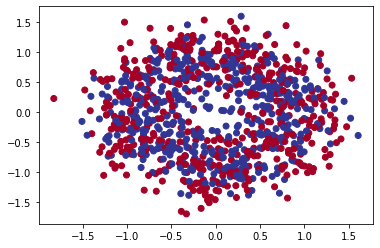

In [ ]:
# Visualize with a plot 
import matplotlib.pyplot as plt
plt.scatter(X[:,0] , X[:,1], c = y, cmap=plt.cm.RdYlBu)

### Input and output shapes 

In [ ]:
# check the shapes of our features and labels 
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working 
len(X), len (y)

(1000, 1000)

In [ ]:
# view the first exaple of features and labels 
X[0], y[0]

(array([0.59171471, 0.43674853]), 1)

### steps in modelling 

In [ ]:
import tensorflow as tf 
# set random seed 
tf.random.set_seed(42)

#1. build the model 
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(1)
])

#2. compile the model 

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['accuracy'])
#3.fit the model 
model.fit(X,y, epochs= 5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.4716 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7222 - accuracy: 0.5050
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4920


In [ ]:
model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5130


[0.6936489939689636, 0.5130000114440918]

In [ ]:
# lets try improve our model by training it for longer 
model.fit(X, y, epochs =100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4730
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4680
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.5070
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5010
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4680
Epoch 11/

###  lets improve it more 

In [ ]:
# set the random seed 
tf.random.set_seed(42)
#1.build the model 
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

#2.compile the model 
model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.SGD(),
                metrics = ['accuracy'])
#3. fit the model 
model_1.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.3595 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7272 - accuracy: 0.4910
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7145 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.4990
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.5120
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4930
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4930
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4730
Epoch 11/

In [ ]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

### Improving our model 

In [ ]:
# set random seed 
tf.random.set_seed(42)

#1. build the model 
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

#2. compile the model

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#3. fit the model 
model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 2.2943 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5030
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6964 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.4970
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.4550
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6956 - accuracy: 0.4960
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4990
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.4900
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.4750
Epoch 11/

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.7029 - accuracy: 0.5090


[0.7028663754463196, 0.5090000033378601]

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:


* Takes in a trained model, features (X) and labels (y).
* Creates a meshgrid of the different X values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).

If this sounds confusing, let's see it in code and then see the output.

In [ ]:
import numpy as np 

def plot_decision_boundary(model,X,y):
  '''
  Plots the decision boundary created by a model predicting on X.
  '''
  #Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
  # Make predictions using the trained model
  y_pred = model.predict(x_in)
  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classifcation...


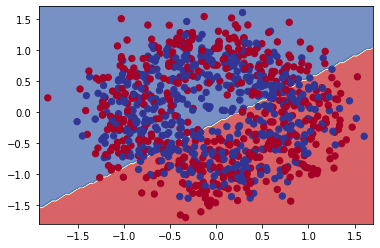

In [ ]:
# check out the predections our model is making 
plot_decision_boundary(model =model_2,
                       X= X,
                       y=y)

### The missing piece : Non-Linearity 

In [ ]:
# set the random seed 
tf.random.set_seed(42)
#1.build the model 
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1 , activation=tf.keras.activations.linear),

])
#2.vcompile the model 
model_4.compile(loss = 'binary_crossentropy',
                optimizer ='Adam',
                metrics = ['accuracy'])
#3. fit the model 
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 4.2995 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 4.2023 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 4.1228 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0098 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9324 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8826 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8008 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7662 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 3.6024 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5558 - accuracy: 0.4840
Epoch 11/

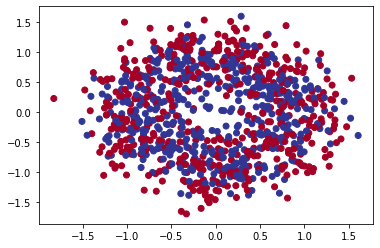

In [ ]:
# check out our data 
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);


doing binary classifcation...


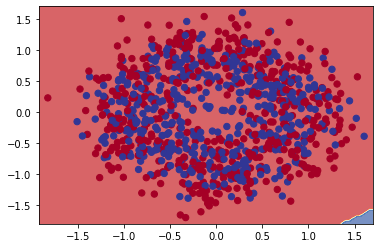

In [ ]:
# check the decision boundary for our latest model 
plot_decision_boundary(model = model_4,
                       X=X,
                       y=y)

### Let's build our first neural network with a non-linear activation function.

In [ ]:
# set the random seed 
tf.random.set_seed(42)
#1. build the model 
model_5=tf.keras.Sequential([
                             tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
                             tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                             tf.keras.layers.Dense(1)

])
#2.compile the model 
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])
#3.fit the model 
history = model_5.fit(X,y,epochs= 100, verbose=0)

In [ ]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classifcation...


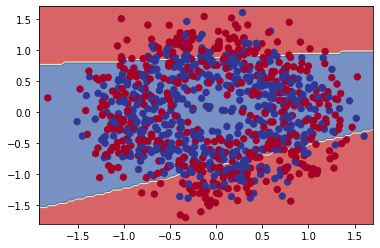

In [ ]:
# how do our model predictions look 
plot_decision_boundary(model_5,X,y)

In [ ]:
#set random seed 
tf.random.set_seed(42)
#1.create the model 
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
                               tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)
])
#2.compile the model 
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])
#3.fit the model 
history = model_6.fit(X,y,epochs = 100,verbose =0)

doing binary classifcation...


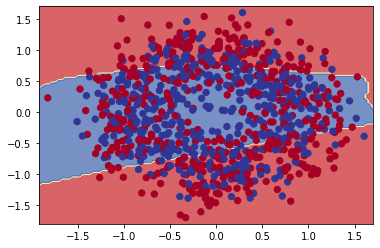

In [ ]:
plot_decision_boundary(model_6,X,y)

In [ ]:
# create a toy tensor 
A =tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

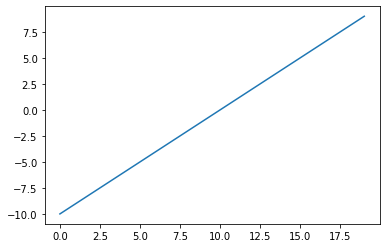

In [ ]:
# visualize our tensor 
plt.plot(A)

In [ ]:
# lets start by replecating sigmoid = 1/ (1+exp(-x))
def sigmoid(x) :
  return 1 / (1+ tf.exp(-x))

# use the sigmoid function on our toy tensor 

sigmoid (A)



<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

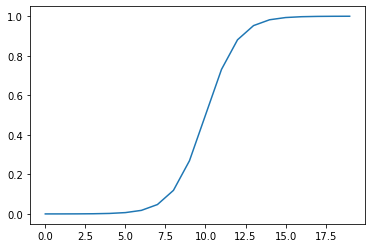

In [ ]:
# lets plot them 
plt.plot(sigmoid(A))

In [ ]:
# lets recreate Relu function
def relu(x):
  return tf.maximum(0,x)

# lets pass our toy tensor to our relu function 
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

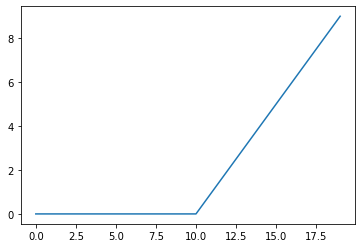

In [ ]:
# lets plot relu tensor 
plt.plot(relu(A))

In [ ]:
# lets try the linear activation function 
b=tf.keras.activations.linear(A)

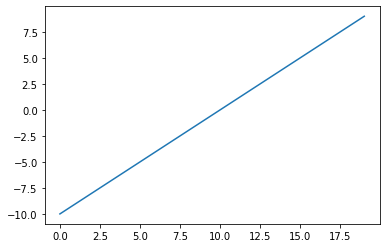

In [ ]:
# does the linear activation function change any thing ?
plt.plot(b)

### Evaluating and improving our classification model

In [ ]:
# check how many examples we have 
len(X)

1000

In [ ]:
X , y

(array([[ 0.59171471,  0.43674853],
        [-0.45745002,  0.36160118],
        [-1.01069349,  0.83042101],
        ...,
        [-0.01985814, -1.02765007],
        [ 0.54269168, -1.11429774],
        [ 0.24539316,  1.01154823]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [ ]:
# split into train and test set 
X_train , y_train  = X[:800],y[:800]
X_test ,y_test = X[800:],y[800:]
X_train.shape ,X_test.shape ,y_train.shape , y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# lets recreat a model to fit in the training data and evaluate on test data 
# st random seed 
tf.random.set_seed(42)

#1. create the model 
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4 , activation ='relu'),
                               tf.keras.layers.Dense(4,activation = 'relu'),
                               tf.keras.layers.Dense(1,activation = 'sigmoid')                               
])
#2.compile the model 
model_8.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate =0.01),
    metrics= ['accuracy']
)
#3.fit the model 
history = model_8.fit(X_train , y_train , epochs = 100)



Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6861 - accuracy: 0.5462
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5550
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5675
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5562
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.5562
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5600
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5675
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5700
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6765 - accuracy: 0.5713
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.5688
Epoch 11/

In [ ]:
# evaluate the model on the test data set 
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.5800


[0.6591827273368835, 0.5799999833106995]

doing binary classifcation...
doing binary classifcation...


<function matplotlib.pyplot.show>

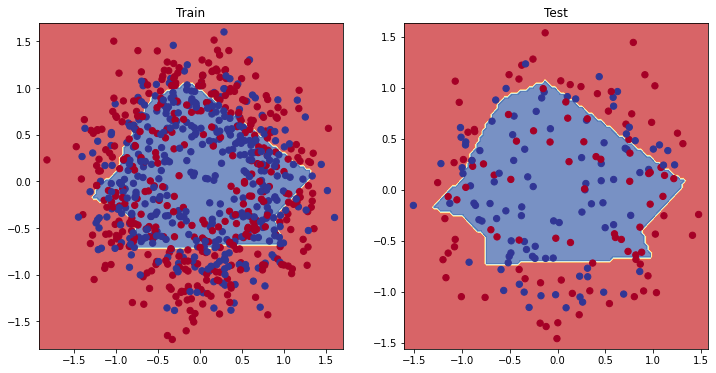

In [ ]:
# plot the decision boundries for the training and test set 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_8, X=X_train , y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show

### Plot the loss (or training ) curves

In [ ]:
history.history

{'accuracy': [0.5462499856948853,
  0.5550000071525574,
  0.5674999952316284,
  0.5562499761581421,
  0.5562499761581421,
  0.5600000023841858,
  0.5674999952316284,
  0.5699999928474426,
  0.5712500214576721,
  0.5687500238418579,
  0.5887500047683716,
  0.581250011920929,
  0.5824999809265137,
  0.5899999737739563,
  0.5837500095367432,
  0.5887500047683716,
  0.5899999737739563,
  0.5862500071525574,
  0.5924999713897705,
  0.5862500071525574,
  0.5712500214576721,
  0.6012499928474426,
  0.6012499928474426,
  0.6025000214576721,
  0.5924999713897705,
  0.6037499904632568,
  0.6100000143051147,
  0.6037499904632568,
  0.6075000166893005,
  0.5950000286102295,
  0.6000000238418579,
  0.5987499952316284,
  0.6200000047683716,
  0.6000000238418579,
  0.6037499904632568,
  0.5862500071525574,
  0.6037499904632568,
  0.5950000286102295,
  0.606249988079071,
  0.6025000214576721,
  0.5987499952316284,
  0.5950000286102295,
  0.6000000238418579,
  0.5975000262260437,
  0.6000000238418579,


In [ ]:
# convert the history object into  a datafram 
pd.DataFrame(history.history)


,loss,accuracy
0,0.686088,0.54625
1,0.682345,0.55500
2,0.681124,0.56750
3,0.679811,0.55625
4,0.678375,0.55625
...,...,...
95,0.654588,0.63000
96,0.659036,0.60000
97,0.656192,0.61000
98,0.654800,0.62250


Text(0.5, 1.0, 'Model_8 loss curves')

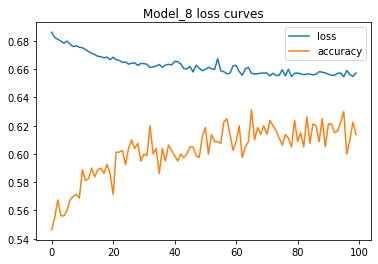

In [ ]:
# plot the loss curves
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

⚡ **Note: For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).**

### Finding the best learning rate 

To do so, we're going to use the following:

**A learning rate callback**.

* You can think of a callback as an extra piece of functionality you can add to your model while its training.

* Another model (we could use the same ones as above, we we're practicing building models here).

* A modified loss curves plot.

In [ ]:
# set random seed 
tf.random.set_seed(42)
#1.build model
model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(1, activation = 'sigmoid')
])
#2.compile the model 
model_9.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer =tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics=['accuracy'])
#creat a learning rate call back ********************************

lr_scheduler = tf.keras.callbacks.LearningRateScheduler( lambda epoch: 1e-4 * 10**(epoch/20))

#3.fit the model 
history_9 = model_9.fit(X_train , y_train ,epochs = 100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6968 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.5063 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.5113 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5088 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5138 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5138 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5150 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5200 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

In [ ]:
#history= model_9.evaluate(X_test,y_test)

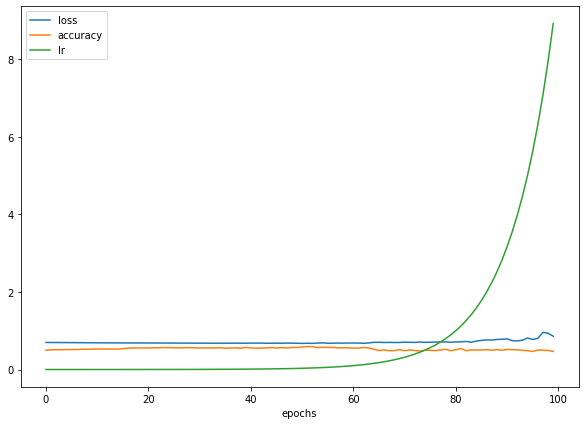

In [ ]:
# check down the history 
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

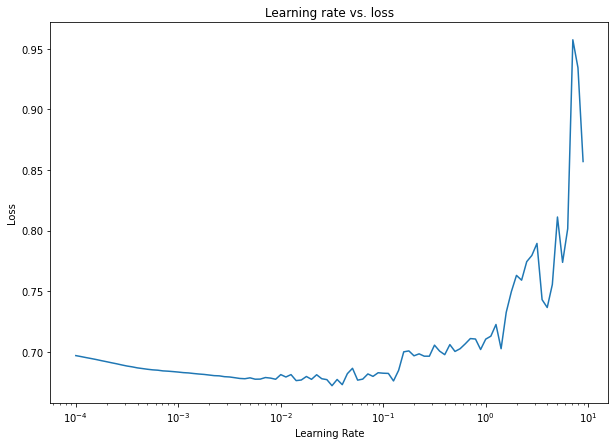

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
# Example of other typical learning rate values
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
25/25 [==============================] - 1s 4ms/step - loss: 0.6862 - accuracy: 0.5362
Epoch 2/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6830 - accuracy: 0.5663
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5462
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.5763
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.5600
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5688
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6741 - accuracy: 0.5638
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5813
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5913
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6718 - accuracy: 0.5813
Epoch 11/20
25/25 [

In [ ]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.5800
Model loss on the test set: 0.6591827273368835
Model accuracy on the test set: 58.00%


doing binary classifcation...
doing binary classifcation...


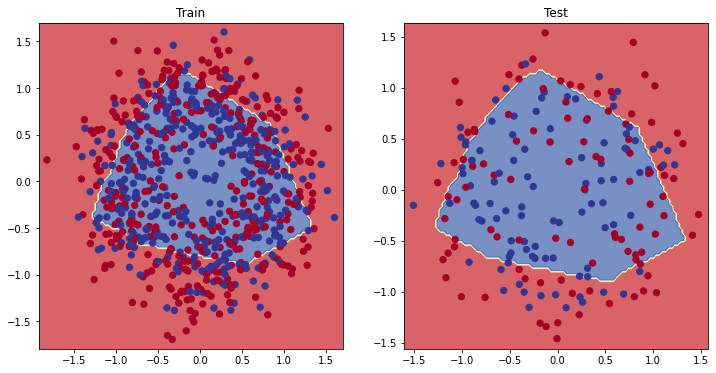

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

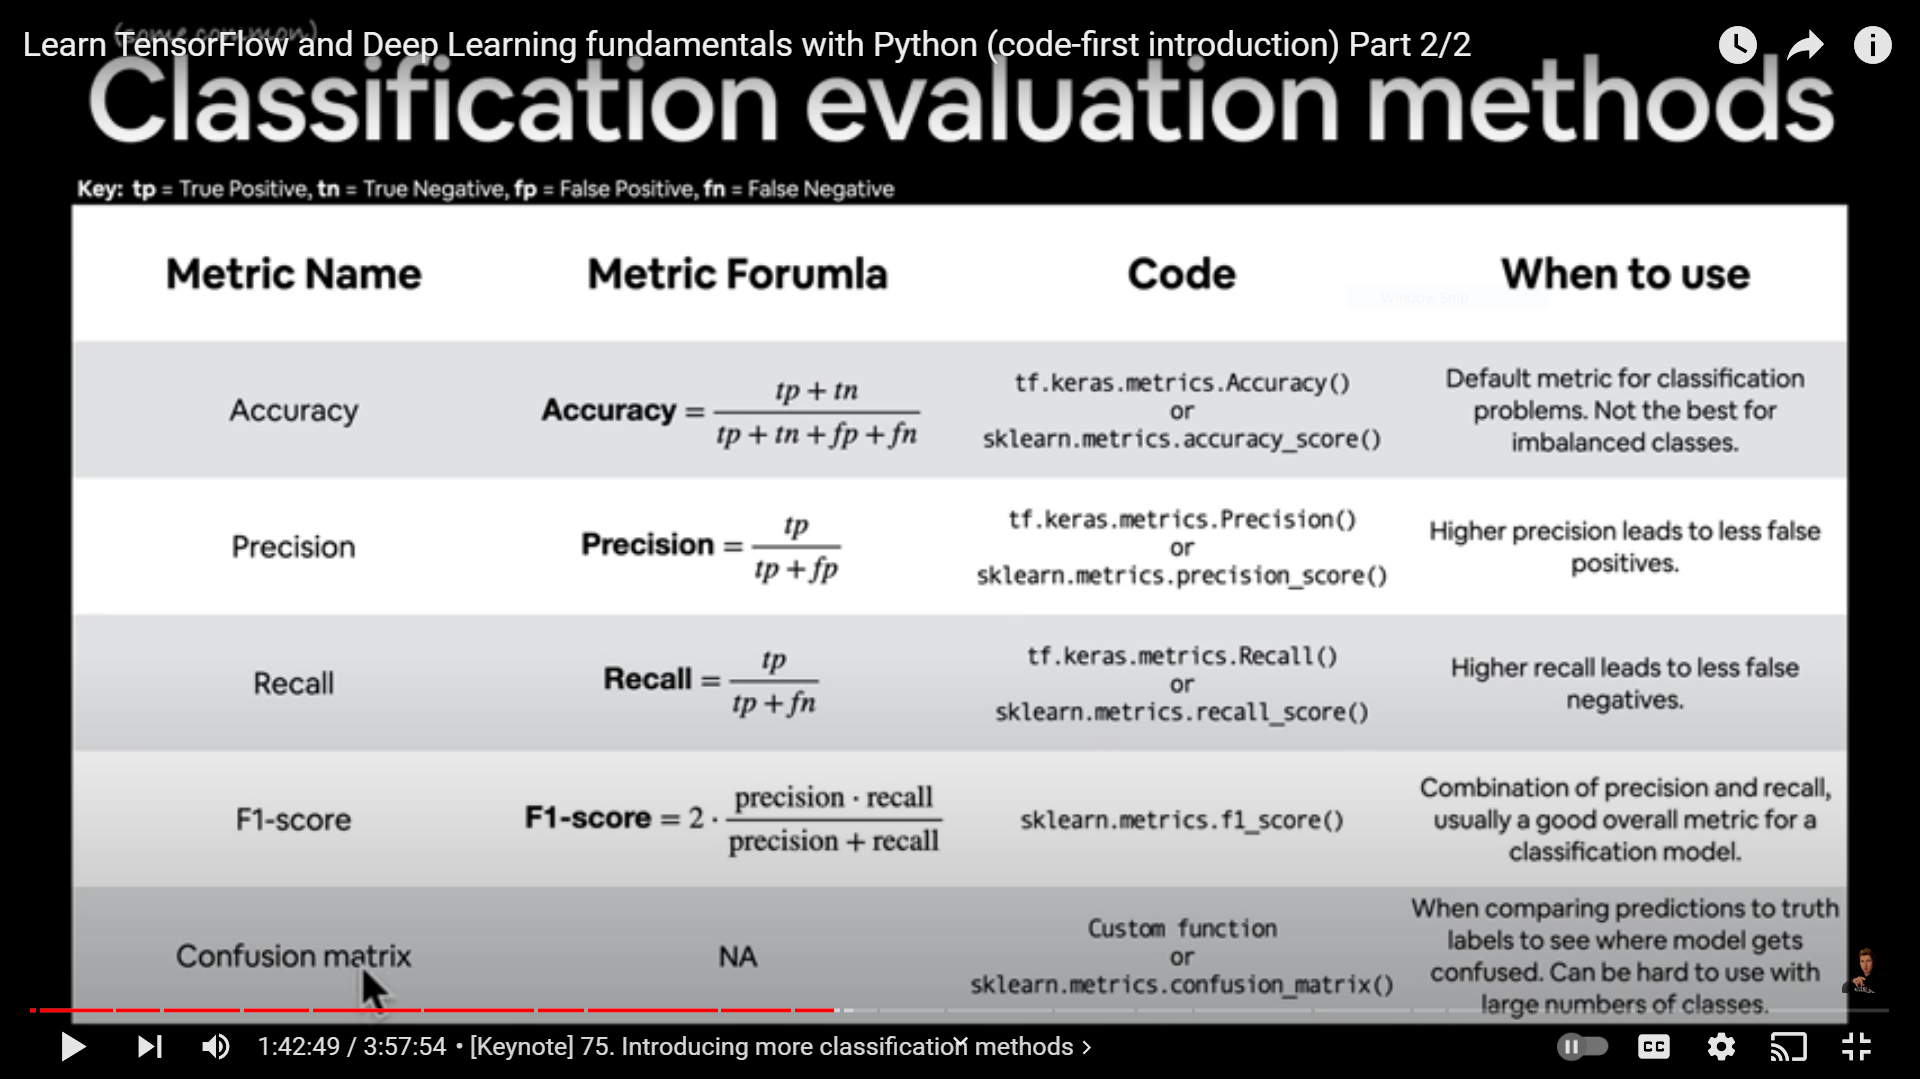

### More classification evaluation methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

* Accuracy 
* Precision
* Recall
* F1-score
* Confusion matrix 
* Classification report -scikit-learn- 

In [ ]:
# check the accuracy of our model
loss ,accuracy = model_10.evaluate(X_test,y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set:{(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.5900
Model loss on the test set: 0.6619537472724915
Model accuracy on the test set:59.00%


### How about a confusion matrix 

In [ ]:
# create a confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions 
y_preds = model_10.predict(X_test)

# create confusion matrix 
#confusion_matrix (y_test,y_preds)
confusion_matrix(y_test, tf.round(y_preds))

array([[53, 48],
       [34, 65]])

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[0.57258224],
       [0.65969825],
       [0.55385846],
       [0.56950593],
       [0.65351456],
       [0.5437267 ],
       [0.4879213 ],
       [0.48492342],
       [0.632509  ],
       [0.5469962 ]], dtype=float32)

It looks like we need to get our predictions into the binary format (0 or 1).

But you might be wondering, what format are they currently in?

In their current format (9.8526537e-01), they're in a form called **prediction probabilities**.

You'll see this often with the outputs of neural networks. Often they won't be exact values but more a probability of how likely they are to be one value or another.

So one of the steps you'll often see after making predicitons with a neural network is converting the prediction probabilities into labels.

In our case, since our ground truth labels (y_test) are binary (0 or 1), we can convert the prediction probabilities using to their binary form using tf.round().

In [ ]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

### How about we make a function to make our confusion matrix a little more visual?

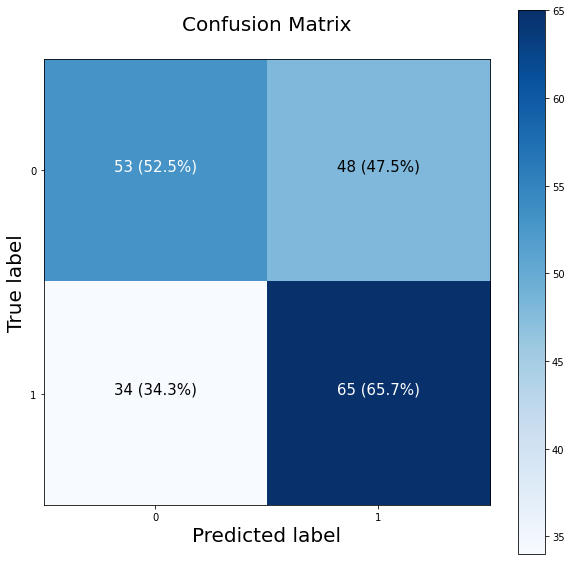

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 

import itertools
figsize = (10,10)
# create the confusion matrix 
cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

### Working with a larger example (multiclass classification)



In [ ]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist

# the data already been sorted into tranining and test sets for us 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
# show the first training example 
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training labels:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# check the shape of a single example 
train_data[0].shape , train_labels[0].shape

((28, 28), ())

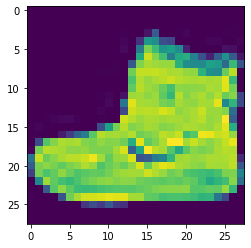

In [ ]:
# plot a snigle sample 
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
# check out sample labels 
train_labels[0]

9

In [ ]:
# create a small list so we can index into our training labels so they are human-readable 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
        
len(class_names)


10

Text(0.5, 1.0, 'T-shirt/top')

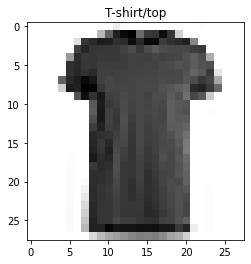

In [ ]:
# Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[index_of_choice]])

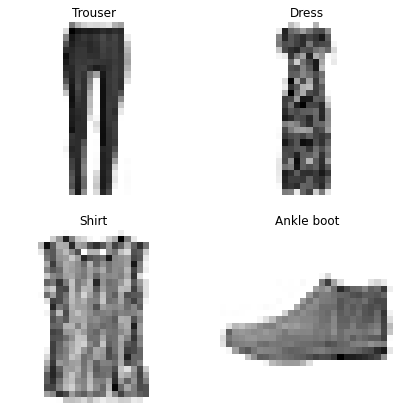

In [ ]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

### Building a multi-class classification model 

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):


**The input shape** will have to deal with 28x28 tensors (the height and width of our images).

* We're actually going to squash the input into a tensor (vector) of shape (784).

**The output shape** will have to be 10 because we need our model to predict for 10 different classes.

* We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.

* We'll need to change our loss function from a binary loss function to a multiclass loss function.
More specifically, **since our labels are in integer form, we'll use** 
tf.keras.losses.SparseCategoricalCrossentropy(),

**if our labels were one-hot encoded** (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().

* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

* Input shape = 28 * 28 (the shape of one image)
* Output shape = 10 (one per class of clothing )
* loss function = tf.keras.losses.CategoricalCrosstentropy()
* Output layer activation = Softmax (not sigmoid)

In [ ]:
# our data needs to be flatten (from 28*28 to None,783)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape= (28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
tf.one_hot(train_labels[:10], depth =10)    # we can use this coz loss function categorical cross entropy  need the predections as one hot encoded ,, but prase cat.... doesnt need one hot encoding

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
# set random seed
tf.random.set_seed(42)
# create the model 
model_11 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape=(28,28)),
                                tf.keras.layers.Dense(4 , activation = 'relu'),
                                tf.keras.layers.Dense(4 , activation = 'relu'),
                                tf.keras.layers.Dense(10 , activation = 'softmax')
])
# compile the model 
model_11.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # if have shape prob use prase categorical entropy
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics= ['accuracy'])
# fit the model 
non_norm_history = model_11.fit(train_data,train_labels, epochs =10,validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [ ]:
# check the model summry
model_11.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_50 (Dense)            (None, 4)                 3140      
                                                                 
 dense_51 (Dense)            (None, 4)                 20        
                                                                 
 dense_52 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# check the min and max values of the training data 
train_data.min(), train_data.max()

(0, 255)

### Neural networks prefer data to be scaled ( or normalized), this means they likely to have the numbers in the tensors they try to find patterns in between 0 and 1

In [ ]:
# we can get our training and testing data between 0 and 1 by dividing by the maximum 
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data 
train_data_norm.min() ,train_data_norm.max()

(0.0, 1.0)

### now our data is normalized , lets build a model to find patterns in it 

In [ ]:
# set random seed 
tf.random.set_seed(42)
# create the model 
model_12 = tf.keras.Sequential([
                                tf.keras.layers.Flatten(input_shape = (28,28)),
                                tf.keras.layers.Dense(4 , activation= 'relu'),
                                tf.keras.layers.Dense(4 , activation='relu'),
                                tf.keras.layers.Dense(10,activation='softmax')
])
# compile the model 
model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                                optimizer = tf.keras.optimizers.Adam(),
                                metrics = ['accuracy'])
#fit the model 
norm_history = model_12.fit(train_data_norm,
                            tf.one_hot(train_labels,depth=10),
                            epochs=10,
                            validation_data = (test_data_norm,tf.one_hot(test_labels,depth=10)))


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

⚡Woah, we used the exact same model as before but we with normalized data we're now seeing a much higher accuracy value!

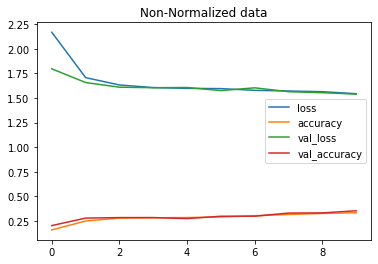

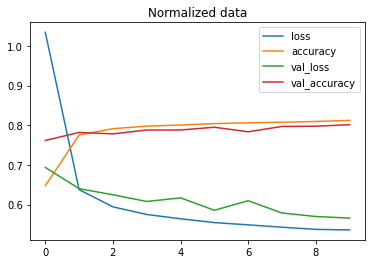

In [ ]:
import pandas as pd
# plot non-normalized data loss curves 
pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized data')
#plot Normalized data loss curves 
pd.DataFrame(norm_history.history).plot(title='Normalized data')

 ⚡ Note: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

### Finding the ideal learning rate 
(where the loss decress the most )

In [ ]:
# set random seed 
tf.random.set_seed
# creat the model 
model_13 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape =(28,28)),
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(10,activation='softmax')

])
# compile the model 
model_13.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)
# create the learning rate call back 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 * 10**(epoch/20))
# fit the model 
find_lr_history = model_13.fit(train_data_norm ,train_labels ,epochs = 10,validation_data = (test_data_norm ,test_labels),callbacks = [lr_scheduler])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2800 - accuracy: 0.5474 - val_loss: 0.8367 - val_accuracy: 0.6707 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7327 - accuracy: 0.7145 - val_loss: 0.6879 - val_accuracy: 0.7373 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6494 - accuracy: 0.7531 - val_loss: 0.6542 - val_accuracy: 0.7552 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6131 - accuracy: 0.7721 - val_loss: 0.6389 - val_accuracy: 0.7622 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5896 - accuracy: 0.7804 - val_loss: 0.6342 - val_accuracy: 0.7664 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5731 - accuracy: 0.7880 - val_loss: 0.6229 - val_accuracy: 0.7781 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 4s

ValueError: ignored

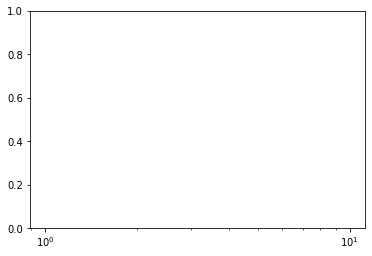

In [ ]:
# plot the learning rate curve 
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 10s 5ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy: 0.3000
Ep

### Evaluating our multi-class classification mode

**options We could:**

* Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).

* Assess some of its predictions (through visualizations).

* Improve its accuracy (by training it for longer or changing the architecture).

* Save and export it for use in an application.

In [ ]:
# create a confusion matrix 
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# make some predictions with our model 
y_probs = model_14.predict(test_data_norm)
# View the first 5 predictions
y_probs[:5]

array([[1.3441686e-01, 5.3524143e-01, 1.4054319e-03, 2.9205623e-01,
        3.6197219e-03, 2.7285493e-03, 2.8233875e-02, 3.5251793e-04,
        1.9385659e-03, 6.8381710e-06],
       [1.2189969e-01, 5.8103353e-01, 2.5369860e-03, 2.7038664e-01,
        3.6255042e-03, 4.2475764e-05, 2.0107385e-02, 4.6015261e-06,
        3.6272334e-04, 4.3207118e-07],
       [1.1183561e-01, 6.1198711e-01, 2.2168742e-03, 2.5242627e-01,
        3.1884862e-03, 3.8026039e-05, 1.7984364e-02, 4.0941381e-06,
        3.1875513e-04, 3.8187792e-07],
       [1.0936887e-01, 6.1963558e-01, 2.1415818e-03, 2.4794346e-01,
        3.0851795e-03, 3.6958900e-05, 1.7475631e-02, 3.9730771e-06,
        3.0836777e-04, 3.6996599e-07],
       [1.1741053e-01, 5.9479105e-01, 2.3915984e-03, 2.6244035e-01,
        3.4274487e-03, 4.0471732e-05, 1.9150915e-02, 4.3725058e-06,
        3.4279178e-04, 4.0936266e-07]], dtype=float32)

In [ ]:
test_data[0], test_data_norm[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

In [ ]:
y_probs[0] , tf.argmax(y_probs[0]) , class_names[tf.argmax(y_probs[0])]

(array([1.3441686e-01, 5.3524143e-01, 1.4054319e-03, 2.9205623e-01,
        3.6197219e-03, 2.7285493e-03, 2.8233875e-02, 3.5251793e-04,
        1.9385659e-03, 6.8381710e-06], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 'Trouser')

In [ ]:
# convert all the prediction probabilties into intgers 
y_preds = y_probs.argmax(axis =1 )
# view the first 10 predtictions labels 
y_preds[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  999,    0,    0,    0,    1,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,  937,    0,    0,    0,   63,    0,    0,    0,    0]])

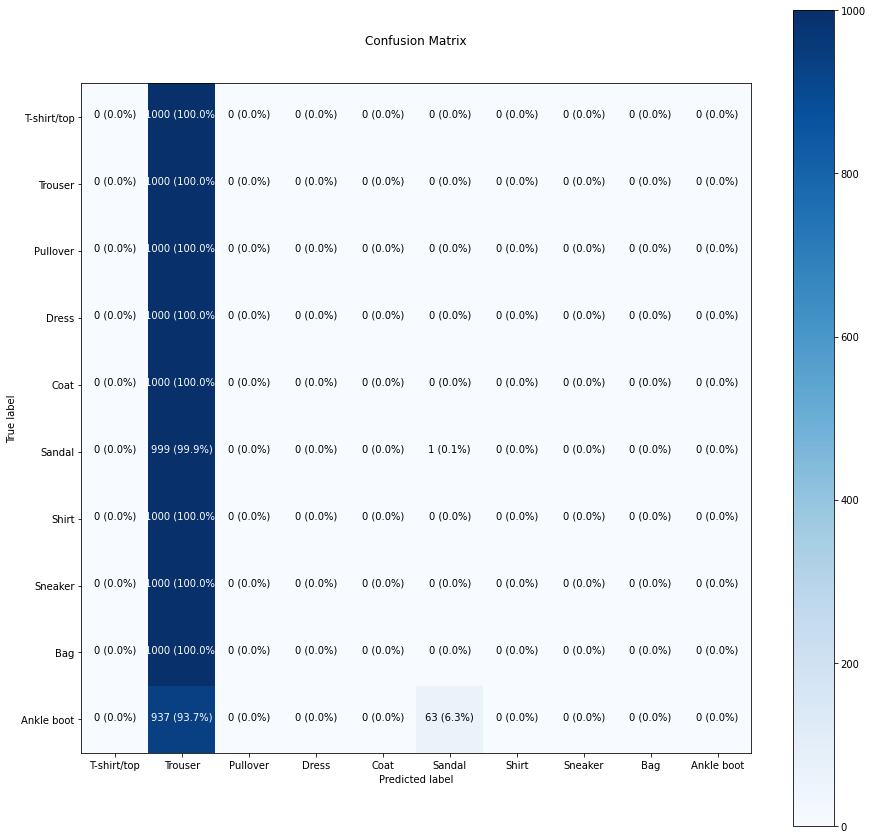

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

⚡ **Note:**
 Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

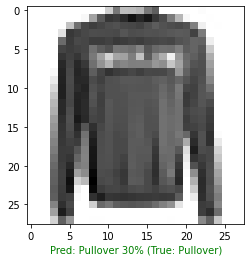

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

### What patterns is our model learning?

In [ ]:
 # Find the layers of our most recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape

(array([[-0.33454674, -0.01029544, -0.02567479, -0.00619847],
        [-0.31549028,  0.03222882,  0.84444135,  0.06499861],
        [-0.38063458, -0.04830738,  0.5861999 ,  0.0388018 ],
        ...,
        [ 0.03173091,  0.01661945, -0.02779595, -0.02348963],
        [-0.00281464,  0.02673633,  0.11831402, -0.07461146],
        [-0.04932603,  0.027058  ,  0.03978666, -0.05812328]],
       dtype=float32), (784, 4))

In [ ]:
# Shape = 1 bias per neuron (we use 4 neurons in the first layer)
biases, biases.shape

(array([ 2.3807328 , -0.02814927,  1.0569581 , -0.04105863], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

The bias values get initialized as zeroes by default (using the bias_initializer parameter).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [ ]:
28 * 28 

784

In [ ]:
model_14.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_62 (Dense)            (None, 4)                 3140      
                                                                 
 dense_63 (Dense)            (None, 4)                 20        
                                                                 
 dense_64 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


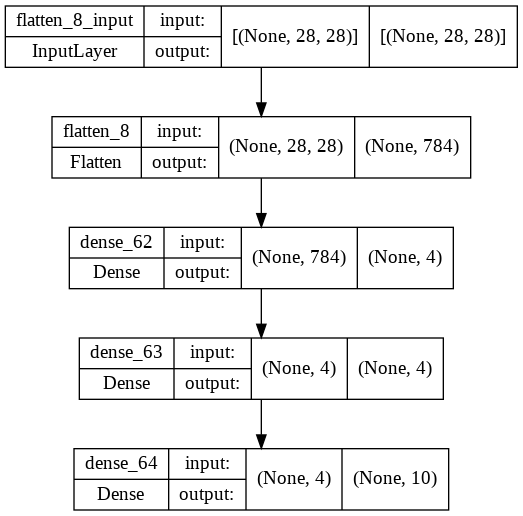

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)